## Final Project

## Name: [Junhui Huang]

## Link to your the github repo: []


In [53]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [55]:
df = pd.read_csv("MBTI.csv")
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [56]:
from sklearn.model_selection import train_test_split

# Assuming 'Personality' is the column that you want to stratify by
X = df.drop(columns=['Personality'])  # Features
y = df['Personality']  # Target (Personality types)

# Perform stratified sampling to pick 10% of the data
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, stratify=y, random_state=42)

# Combine the sampled features and target back into a dataframe
df_shrink = X_sample.copy()
df_shrink['Personality'] = y_sample

# Check the sampled data
df_shrink.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
10259,20.0,Male,0,4.30928,6.237389,5.72587,5.488339,Unknown,INFP
64078,35.0,Male,0,9.89723,3.750323,3.26948,2.795124,Sports,ENFP
72567,20.0,Female,1,8.32711,3.906487,6.35944,5.522060,Unknown,ENTP
126616,21.0,Male,1,4.71501,3.816058,7.64298,5.530666,Unknown,ENTP
36941,21.0,Male,1,3.98348,4.202141,2.45037,3.512611,Unknown,ENFP


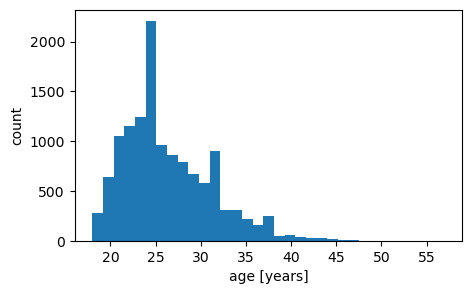

In [57]:
plt.figure(figsize=(5,3))

df_shrink['Age'].plot.hist(bins = df_shrink['Age'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('age [years]')
plt.ylabel('count')
plt.show()

<Figure size 1200x700 with 0 Axes>

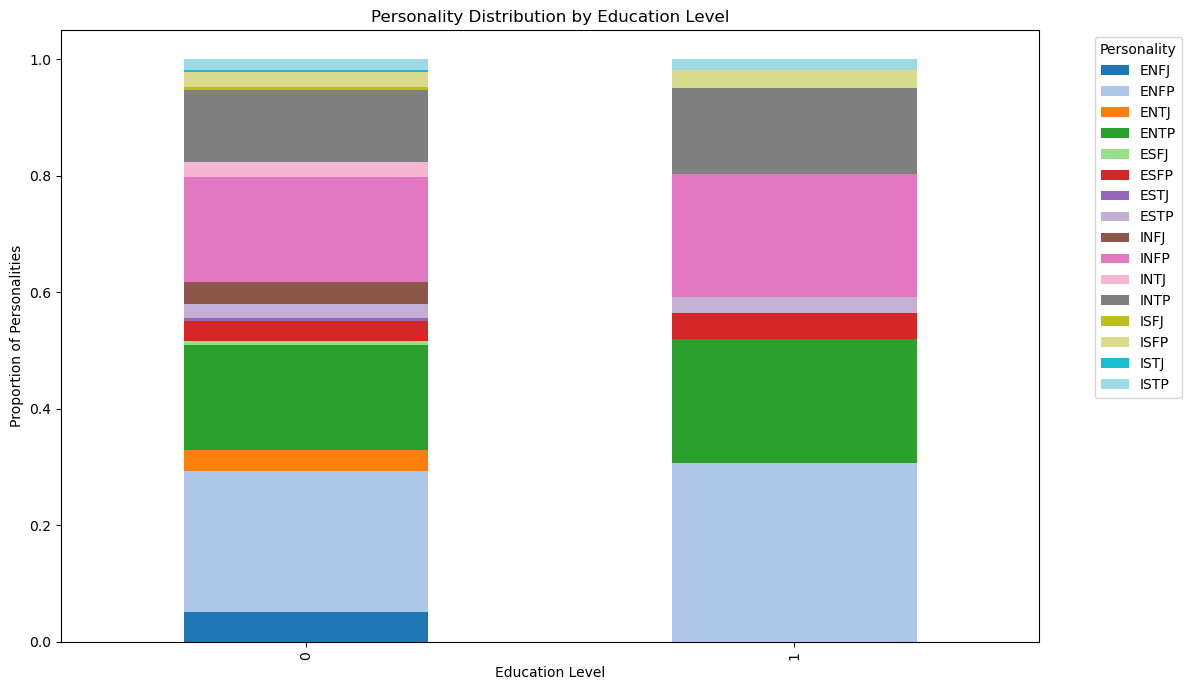

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Cross-tabulation of Education and Personality
edu_personality_ct = pd.crosstab(df_shrink['Education'], df_shrink['Personality'])

# Normalize the cross-tab to get proportions within each education level
edu_personality_ct_normalized = edu_personality_ct.div(edu_personality_ct.sum(axis=1), axis=0)

# Set the figure size larger for better readability
plt.figure(figsize=(12, 7))

# Plotting the normalized cross-tab as a stacked bar chart with distinct color map
edu_personality_ct_normalized.plot(kind='bar', stacked=True, figsize=(12, 7), colormap="tab20")

plt.title('Personality Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Personalities')
plt.legend(title='Personality', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [84]:
from scipy.stats import chi2_contingency

# Chi-Square test to assess the relationship between Education and Personality
chi2_stat, p, dof, expected = chi2_contingency(edu_personality_ct)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p}")


Chi-Square Statistic: 1001.1324565064344
P-Value: 7.706928614346745e-204


In [58]:
print("data shape is",df.shape)

pd.set_option('display.max_rows', None)
print(df.dtypes)

data shape is (128061, 9)
Age                   float64
Gender                 object
Education               int64
Introversion Score    float64
Sensing Score         float64
Thinking Score        float64
Judging Score         float64
Interest               object
Personality            object
dtype: object


In [59]:
print(df["Personality"].describe())

count     128061
unique        16
top         ENFP
freq       34404
Name: Personality, dtype: object


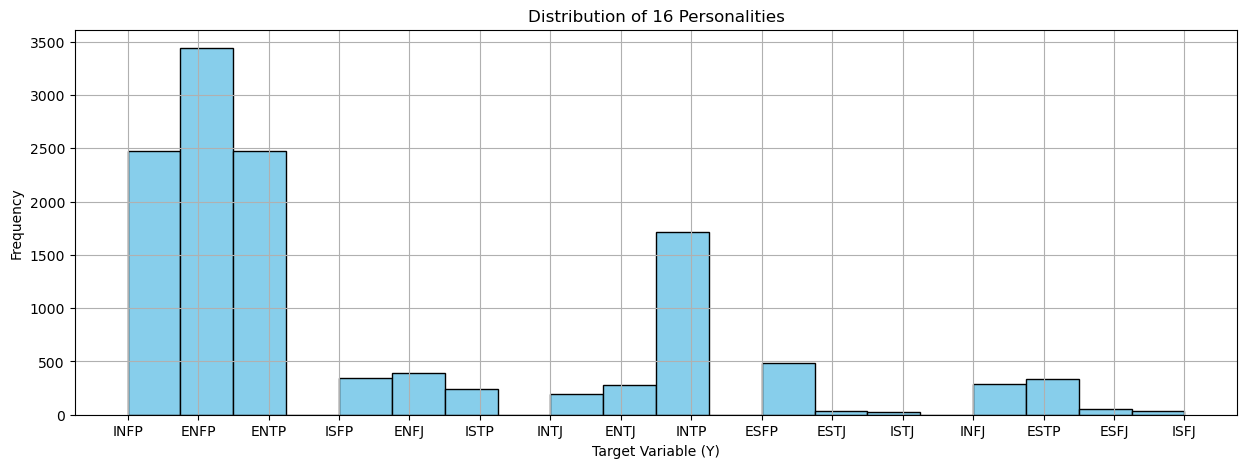

In [60]:
plt.figure(figsize=(15, 5))
plt.hist(df_shrink["Personality"], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of 16 Personalities')
plt.xlabel('Target Variable (Y)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Interest         Arts    Others    Sports  Technology   Unknown
Personality                                                    
ENFJ         0.134021  0.152062  0.280928    0.097938  0.335052
ENFP         0.171512  0.167442  0.092442    0.161047  0.407558
ENTJ         0.201439  0.143885  0.251799    0.129496  0.273381
ENTP         0.235841  0.167071  0.088997    0.135922  0.372168
ESFJ         0.196429  0.125000  0.196429    0.125000  0.357143
ESFP         0.178054  0.173913  0.103520    0.142857  0.401656
ESTJ         0.153846  0.102564  0.256410    0.076923  0.410256
ESTP         0.200599  0.149701  0.080838    0.185629  0.383234
INFJ         0.150685  0.150685  0.226027    0.147260  0.325342
INFP         0.169567  0.171186  0.097531    0.161878  0.399838
INTJ         0.197917  0.187500  0.177083    0.098958  0.338542
INTP         0.241097  0.168710  0.086398    0.158202  0.345593
ISFJ         0.135135  0.054054  0.324324    0.162162  0.324324
ISFP         0.190751  0.158960  0.11560

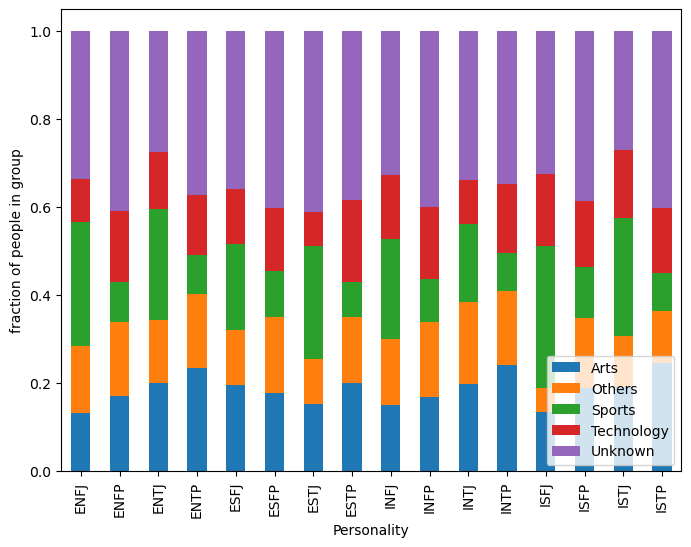

In [61]:
# I want to see if there are specific interests that are more common for certain personalities?
count_matrix = df_shrink.groupby([ 'Personality','Interest']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(8,6))
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

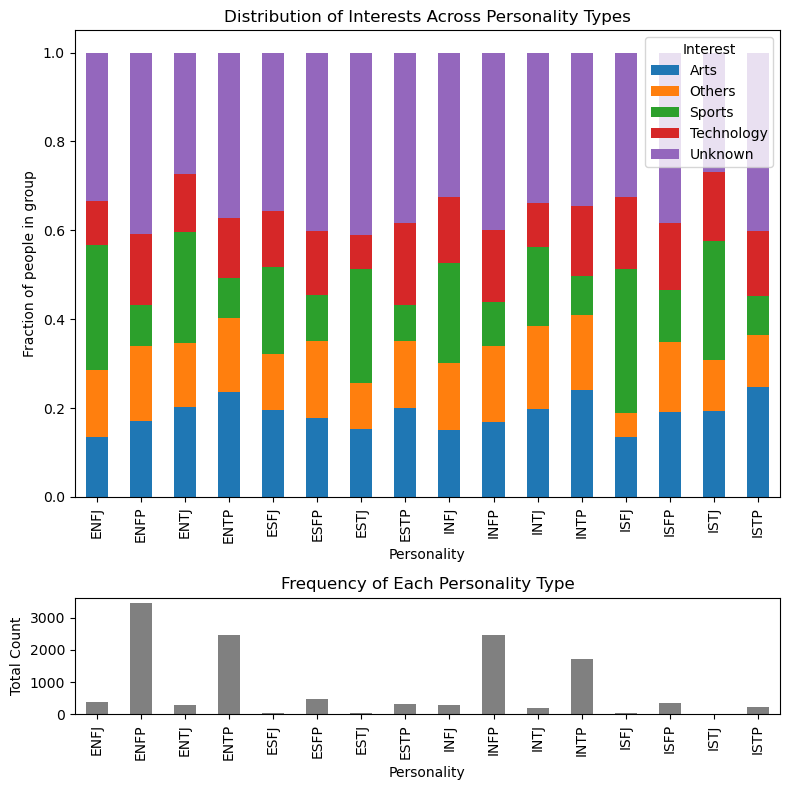

In [62]:
import matplotlib.pyplot as plt

# Group by Personality and Interest, and get the counts
count_matrix = df_shrink.groupby(['Personality', 'Interest']).size().unstack()

# Normalize the counts within each personality group (for stacked bar plot)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)

# Add an extra column to capture the total number of people with each personality
personality_totals = count_matrix.sum(axis=1)

# Create a figure with subplots: one for the stacked bar plot, one for the total frequencies
fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [4, 1]})

# Plot the normalized data (stacked bars)
count_matrix_norm.plot(kind='bar', stacked=True, ax=ax[0])

# Plot the frequency of each personality as a separate bar plot
personality_totals.plot(kind='bar', ax=ax[1], color='gray')

# Set labels and titles for both plots
ax[0].set_ylabel('Fraction of people in group')
ax[0].set_title('Distribution of Interests Across Personality Types')

ax[1].set_ylabel('Total Count')
ax[1].set_title('Frequency of Each Personality Type')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


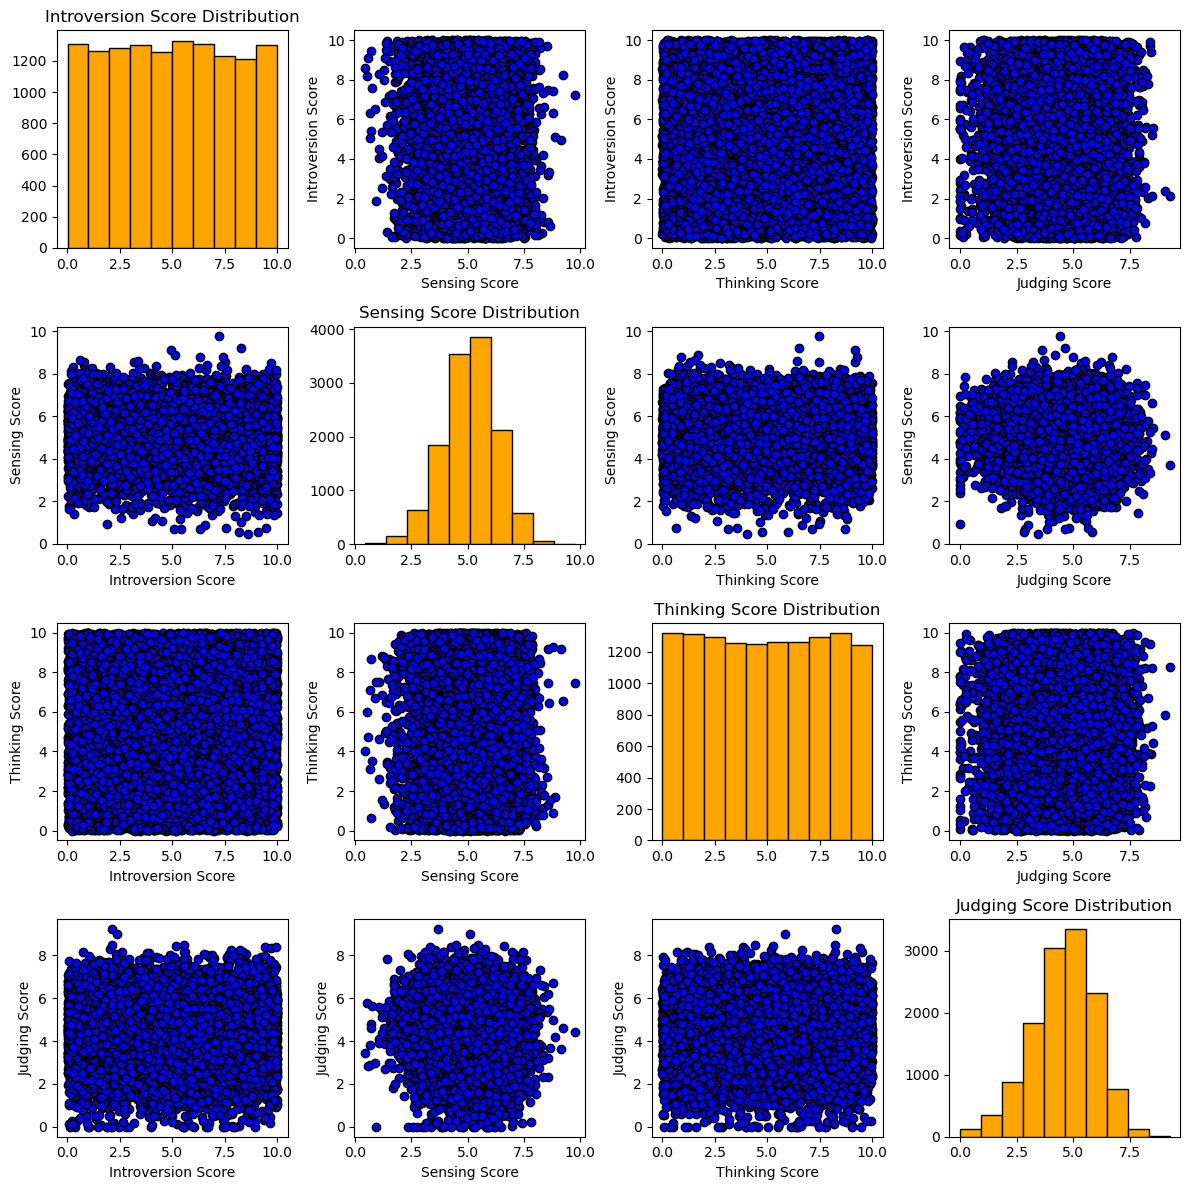

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# List of columns for personality trait scores
traits = ['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']

# Create pairwise scatter plots and histograms
num_traits = len(traits)
fig, axes = plt.subplots(nrows=num_traits, ncols=num_traits, figsize=(12, 12))

# Plot scatter plots for off-diagonal and histograms for diagonal
for i, j in itertools.product(range(num_traits), range(num_traits)):
    if i == j:
        # Diagonal: plot histograms
        axes[i, j].hist(df_shrink[traits[i]], bins=10, color='orange', edgecolor='black')
        axes[i, j].set_title(f'{traits[i]} Distribution')
    else:
        # Off-diagonal: plot scatter plots
        axes[i, j].scatter(df_shrink[traits[j]], df_shrink[traits[i]], color='blue', edgecolors='black')
        axes[i, j].set_xlabel(traits[j])
        axes[i, j].set_ylabel(traits[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [64]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df_shrink.drop(columns=['Personality'])  # Dropping the target variable from features
y = df_shrink['Personality']  # Target variable

# Initial stratified split to separate out the test set (60% train, 40% test+validation)
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Now, split the training+validation set into training and validation sets (50% test, 50% validation of the original train+validation set)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.5, stratify=y_other, random_state=42)

# X_train, X_val, X_test contain the features for training, validation, and test sets respectively
# y_train, y_val, y_test contain the labels for training, validation, and test sets respectively


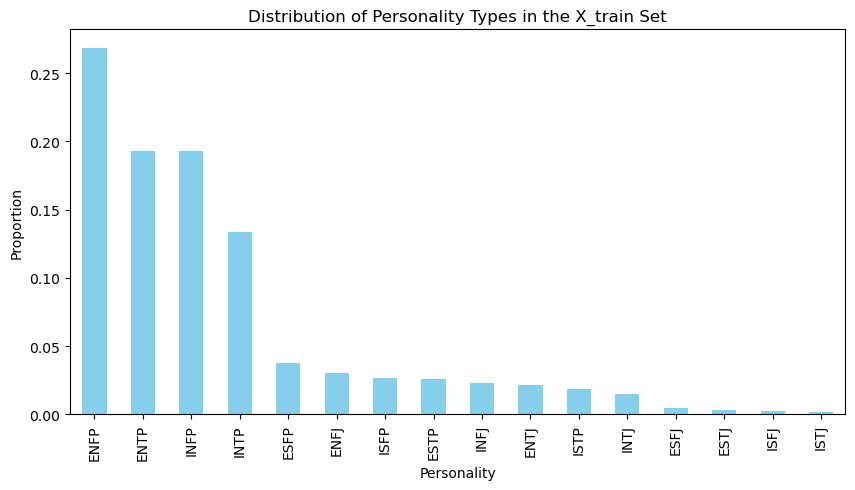

In [65]:
import matplotlib.pyplot as plt

# Plot the distribution of personality types in the X_train set
plt.figure(figsize=(10, 5))
y_train.value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Distribution of Personality Types in the X_train Set')
plt.ylabel('Proportion')
plt.show()


In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

# Define feature types based on your dataset
ordinal_ftrs = ['Education']  # Assuming education levels can be ordinal
ordinal_cats = [['0', '1']]  # Adjust categories based on actual values in Education

onehot_ftrs = ['Gender', 'Interest']  # Categorical variables for One-Hot Encoding

minmax_ftrs = ['Age']  # Continuous numerical variable to be scaled to [0, 1]

std_ftrs = ['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']  # Personality scores for standardization

# Create the ColumnTransformer with different preprocessing methods for each feature type
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),  # Use 'sparse' for older versions
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ])

# Create a pipeline that includes the preprocessor
clf = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the preprocessing pipeline to X_train, X_val, and X_test
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# Print the shapes of the preprocessed data
print(X_train.shape)
print(X_train_prep.shape)

(7683, 8)
(7683, 13)


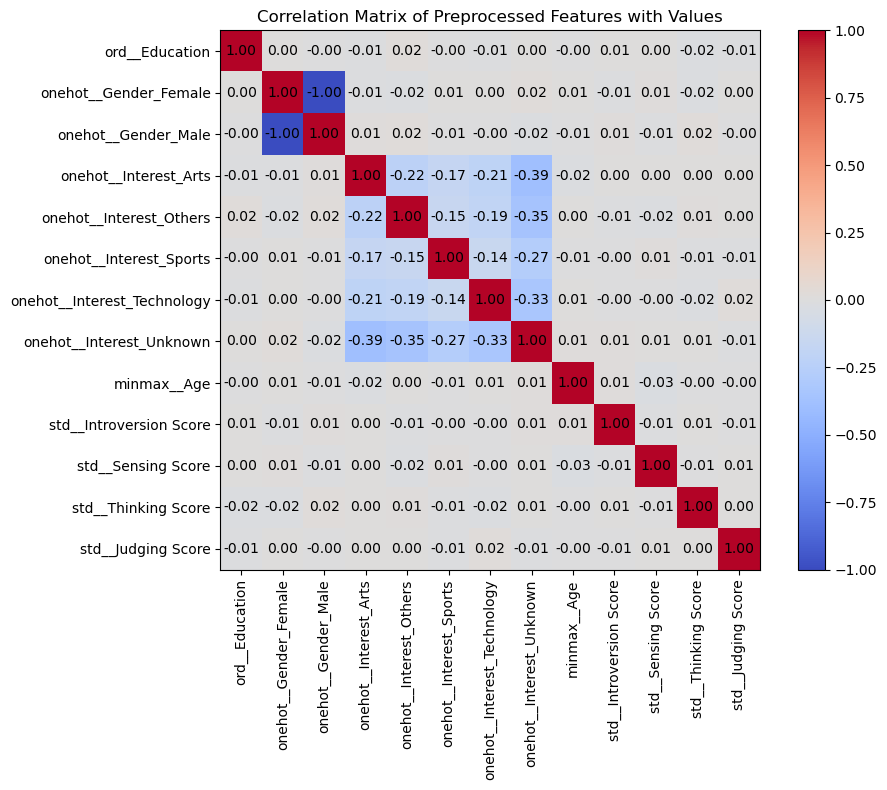

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train_prep is the preprocessed data
# Assuming feature_names contains the names of the preprocessed features

# Compute the correlation matrix for the preprocessed data
corr_matrix = np.corrcoef(X_train_prep.T)

# Plot the correlation matrix using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Add labels for better understanding
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=90)
plt.yticks(np.arange(len(feature_names)), feature_names)

# Add correlation values to the plot
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        plt.text(j, i, f"{corr_matrix[i, j]:.2f}", ha='center', va='center', color='black')

plt.title('Correlation Matrix of Preprocessed Features with Values')
plt.tight_layout()
plt.show()
